# <font color=blue>Factors That Lead to a lot of Installs and Popular Categories</font> 

## Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 5400)

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})

In [5]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

## Preprocessing

In [6]:
raw_data = pd.read_csv('googleplaystore.csv')
raw_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df = raw_data.copy()

Looking at data and removing all rows with missing values.

In [8]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
df = df.dropna(axis=0)

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Analyzing each column and converting useful values to numbers as well as removing columns that aren't useful for this analysis.

In [12]:
df.App.count()

9360

In [13]:
df = df.drop(['App'], axis=1)

Knowing each app's name won't help us with our analysis of trying to find out what factors contribute to a high install rate. We can see there are over 10,000 unique apps in this data set. Our goal is not to find what individual app is highly downloaded but what underlying factors lead to an app being downloaded on the google play store.

In [14]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [15]:
category_dummies = pd.get_dummies(df['Category'])

In [16]:
category_dummies.tail()

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
10834,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10839,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10840,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
df = pd.concat([df, category_dummies], axis=1)

In [18]:
df.tail()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
10834,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10836,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10837,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10839,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10840,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
df = df.drop(['Category'], axis=1)

In [20]:
df.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


I created dummy variables for each of the 34 category names, this is going to be useful for better in-depth analysis.

In [21]:
df.Rating.min()

1.0

In [22]:
df.Rating.max()

5.0

I'm not going to make any changes to the rating column as it is good the way it is.

In [23]:
df = df.drop(['Reviews'], axis=1)

I decided to drop reviews as it won't help in the analysis because if an app has a lot of reviews it will also have a lot of installs.

In [24]:
for x in df['Size']:
    print(x)

19M
14M
8.7M
25M
2.8M
5.6M
19M
29M
33M
3.1M
28M
12M
20M
21M
37M
5.5M
17M
39M
31M
14M
12M
4.2M
23M
6.0M
25M
6.1M
4.6M
4.2M
9.2M
5.2M
11M
11M
4.2M
9.2M
24M
Varies with device
11M
9.4M
15M
10M
Varies with device
1.2M
12M
24M
26M
8.0M
7.9M
25M
56M
57M
Varies with device
35M
33M
33M
5.6M
54M
201k
3.6M
5.7M
17M
8.6M
2.4M
27M
2.7M
2.5M
Varies with device
Varies with device
7.0M
35M
16M
16M
Varies with device
17M
3.4M
8.9M
3.9M
2.9M
38M
32M
37M
15M
5.4M
18M
Varies with device
38M
1.1M
Varies with device
Varies with device
7.9M
35M
Varies with device
17M
19M
14M
2.2M
4.5M
17M
14M
9.8M
21M
Varies with device
52M
14M
25M
9.0M
Varies with device
12M
Varies with device
35M
6.7M
30M
2.9M
17M
2.9M
Varies with device
Varies with device
2.6M
4.2M
7.1M
57M
22M
24M
21M
3.4M
6.4M
3.2M
8.2M
2.9M
23M
4.6M
3.1M
Varies with device
4.9M
9.5M
Varies with device
Varies with device
Varies with device
Varies with device
Varies with device
4.2M
5.4M
Varies with device
2.8M
5.0M
Varies with device
5.9M
13M
7.1M
6.7M

Varies with device
4.1M
18M
14M
Varies with device
Varies with device
Varies with device
696k
4.7M
8.1M
Varies with device
7.9M
4.6M
544k
3.5M
Varies with device
Varies with device
525k
2.1M
Varies with device
14M
Varies with device
8.7M
21M
Varies with device
12M
18M
17M
3.8M
Varies with device
23M
14M
15M
9.9M
12M
12M
20M
7.4M
3.0M
Varies with device
14M
14M
7.2M
22M
7.2M
Varies with device
26M
38M
3.9M
Varies with device
5.4M
9.8M
7.6M
1.1M
9.1M
6.8M
12M
3.3M
12M
9.8M
920k
14M
6.8M
27M
7.4M
Varies with device
29M
Varies with device
Varies with device
5.9M
14M
14M
26M
1.9M
3.9M
779k
Varies with device
Varies with device
5.1M
10M
13M
4.0M
5.4M
3.3M
4.3M
853k
21M
6.4M
8.6M
2.1M
7.1M
Varies with device
Varies with device
3.3M
3.5M
4.1M
9.7M
3.3M
7.1M
8.4M
7.0M
5.5M
Varies with device
Varies with device
Varies with device
13M
Varies with device
Varies with device
5.9M
Varies with device
24M
6.2M
Varies with device
Varies with device
6.9M
Varies with device
6.1M
Varies with device
Varies 

42M
Varies with device
9.1M
2.8M
30M
14M
37M
52M
4.4M
32M
3.4M
23M
61M
15M
64M
12M
4.4M
3.6M
2.9M
10M
7.2M
3.8M
1.1M
1.9M
36M
Varies with device
17M
Varies with device
4.3M
4.0M
Varies with device
5.1M
2.7M
97M
19M
100M
Varies with device
73M
100M
18M
18M
44M
Varies with device
5.2M
8.9M
34M
30M
1.6M
4.4M
3.7M
11M
4.7M
33M
13M
14M
7.3M
Varies with device
37M
13M
13M
8.4M
45M
7.9M
11M
6.2M
3.7M
6.0M
8.8M
22M
30M
11M
4.1M
3.4M
13M
39M
5.1M
4.7M
5.5M
5.3M
2.8M
9.0M
51M
206k
954k
26M
9.4M
2.4M
5.8M
20M
35M
17M
42M
35M
26M
17M
60M
25M
38M
2.0M
2.5M
9.2M
444k
15M
12M
4.4M
14M
6.7M
2.2M
Varies with device
5.7M
87M
30M
68M
Varies with device
19M
40M
49M
52M
63M
24M
6.0M
17M
4.2M
32M
717k
Varies with device
4.3M
7.2M
1.2M
31M
17M
46M
20M
8.3M
5.0M
22M
2.0M
12M
5.5M
14M
Varies with device
15M
81M
8.9M
Varies with device
3.0M
13M
11M
29M
Varies with device
2.6M
1.7M
5.4M
30M
31M
14M
37M
4.0M
Varies with device
6.9M
14M
210k
13M
18M
13M
3.8M
3.2M
3.2M
609k
1.7M
4.0M
6.5M
14M
2.8M
33M
3.3M
3.9M
15M

16M
63M
12M
30M
44M
43M
17M
42M
6.3M
20M
16M
13M
6.3M
2.7M
56M
1.1M
26M
56M
785k
25M
4.7M
6.0M
4.9M
18M
Varies with device
66M
41M
96M
76M
4.2M
36M
24M
35M
23M
13M
19M
Varies with device
7.6M
96M
35M
Varies with device
81M
95M
10M
21M
4.7M
27M
25M
3.4M
33M
5.7M
3.1M
Varies with device
4.3M
4.5M
46M
33M
58M
9.3M
6.2M
6.7M
41M
6.0M
9.5M
60M
31M
36M
4.3M
1.5M
68M
1.2M
12M
22M
45M
62M
80M
34M
3.5M
67M
58M
5.1M
5.5M
12M
19M
19M
8.8M
11M
12M
32M
22M
38M
Varies with device
Varies with device
60M
35M
15M
43M
Varies with device
4.4M
2.1M
Varies with device
23M
636k
4.2M
7.9M
1.4M
916k
84M
6.6M
12M
14M
5.0M
2.9M
8.4M
3.0M
2.6M
3.7M
100M
5.8M
4.5M
3.1M
22M
49M
1.6M
8.9M
22M
23M
94M
6.3M
1.1M
95M
21M
9.5M
24M
1.5M
7.9M
13M
24M
Varies with device
Varies with device
51M
49M
994k
66M
32M
2.9M
8.9M
47M
2.1M
12M
7.8M
15M
25M
14M
10M
8.9M
4.8M
3.2M
4.7M
Varies with device
2.0M
14M
4.7M
22M
14M
4.3M
Varies with device
5.2M
309k
8.7M
485k
2.5M
9.2M
39M
96M
Varies with device
6.9M
9.8M
6.2M
914k
8.2M
Varie

In [25]:
df = df.drop(['Size'], axis=1)

I decided to drop size as I don't believe it will have much of an impact on installs, also there is a lot of missing values stating "variance with device".

In [26]:
df.Installs.describe()

count           9360
unique            19
top       1,000,000+
freq            1576
Name: Installs, dtype: object

In [27]:
installs_lst = []

for x in df['Installs']:
    installs = x.replace(',','')
    installs = installs[:-1]
    installs = int(installs)
    installs_lst.append(installs)
    
df['Installs'] = installs_lst

In [28]:
df.head()

,Rating,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,4.1,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.3,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df.Installs.max()

1000000000

In [30]:
df.Installs.min()

1

I converted the installs column into integers, as well as removing the + sign at the end of each value. Note that installs numbers are not exact but for are case it should still be okay and we will be able to draw out meaningful insight.

In [31]:
df = df.drop(['Type'], axis=1)

I've also decided to drop the type column because we have a price column that gives us the same information, and if in the future if want to differentiate between "Free" and "Paid" apps I can easily with just the price column.

In [32]:
price_lst = []

for x in df['Price']:
    price = x.replace('$','')
    price = float(price)
    price_lst.append(price)
    
df['Price'] = price_lst    

In [33]:
df.tail(50)

,Rating,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
10768,3.8,10000,0.00,Everyone,Medical,"June 22, 2018",2.3.1,5.0 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10770,4.0,100000,0.00,Teen,Action,"August 29, 2017",1.2,2.3 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10771,3.9,1000,0.00,Everyone,Productivity,"April 23, 2017",1.1,4.0 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10776,5.0,10,0.00,Everyone,Racing,"March 5, 2018",2.0,2.3 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10777,3.9,100000,0.00,Everyone,Arcade,"August 30, 2017",1.2,4.0 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10778,4.0,10000,0.00,Everyone,Role Playing,"June 8, 2018",1.0.0.96,4.1 and up,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10779,3.6,10000,0.00,Everyone 10+,Role Playing,"June 1, 2018",1.022,4.4 and up,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10780,4.1,1000,0.00,Everyone,Strategy,"March 16, 2018",15,4.1 and up,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10781,4.3,10000000,0.00,Teen,Action,"July 30, 2018",1.25.4,4.1 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10782,3.8,10000,16.99,Teen,Action,"February 27, 2015",2.22,5.0 and up,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
df.Price.max()

400.0

Converted price column into floats so we can use it in future analysis.

In [35]:
df['Content Rating'].describe()

count         9360
unique           6
top       Everyone
freq          7414
Name: Content Rating, dtype: object

In [36]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [37]:
cr_dummies = pd.get_dummies(df['Content Rating'])

In [38]:
df = pd.concat([df, cr_dummies], axis=1)

In [39]:
df = df.drop(['Content Rating'], axis=1)

In [40]:
df.head()

,Rating,Installs,Price,Genres,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,10000,0.0,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3.9,500000,0.0,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4.7,5000000,0.0,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.5,50000000,0.0,Art & Design,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.3,100000,0.0,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


Created dummy variables for the content rating column.

In [41]:
df.Genres.describe()

count      9360
unique      115
top       Tools
freq        732
Name: Genres, dtype: object

In [42]:
df.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [43]:
genres_dummies = pd.get_dummies(df['Genres'])

In [44]:
df = pd.concat([df, genres_dummies], axis=1)

In [45]:
df = df.drop(['Genres'], axis=1)

In [46]:
df.head()

,Rating,Installs,Price,Last Updated,Current Ver,Android Ver,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,Art & Design;Creativity,Art & Design;Pretend Play,Auto & Vehicles,Beauty,Board,Board;Action & Adventure,Board;Brain Games,Board;Pretend Play,Books & Reference,Books & Reference;Education,Business,Card,Card;Action & Adventure,Card;Brain Games,Casino,Casual,Casual;Action & Adventure,Casual;Brain Games,Casual;Creativity,Casual;Education,Casual;Music & Video,Casual;Pretend Play,Comics,Comics;Creativity,Communication,Communication;Creativity,Dating,Education,Education;Action & Adventure,Education;Brain Games,Education;Creativity,Education;Education,Education;Music & Video,Education;Pretend Play,Educational,Educational;Action & Adventure,Educational;Brain Games,Educational;Creativity,Educational;Education,Educational;Pretend Play,Entertainment,Entertainment;Action & Adventure,Entertainment;Brain Games,Entertainment;Creativity,Entertainment;Education,Entertainment;Music & Video,Entertainment;Pretend Play,Events,Finance,Food & Drink,Health & Fitness,Health & Fitness;Action & Adventure,Health & Fitness;Education,House & Home,Libraries & Demo,Lifestyle,Lifestyle;Education,Lifestyle;Pretend Play,Maps & Navigation,Medical,Music,Music & Audio;Music & Video,Music;Music & Video,News & Magazines,Parenting,Parenting;Brain Games,Parenting;Education,Parenting;Music & Video,Personalization,Photography,Productivity,Puzzle,Puzzle;Action & Adventure,Puzzle;Brain Games,Puzzle;Creativity,Puzzle;Education,Racing,Racing;Action & Adventure,Racing;Pretend Play,Role Playing,Role Playing;Action & Adventure,Role Playing;Brain Games,Role Playing;Pretend Play,Shopping,Simulation,Simulation;Action & Adventure,Simulation;Education,Simulation;Pretend Play,Social,Sports,Sports;Action & Adventure,Strategy,Strategy;Action & Adventure,Strategy;Creativity,Strategy;Education,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
0,4.1,10000,0.0,"January 7, 2018",1.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,500000,0.0,"January 15, 2018",2.0.0,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,5000000,0.0,"August 1, 2018",1.2.4,4.0.3 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.5,50000000,0.0,"June 8, 2018",Varies with device,4.2 and up,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Created dummy variables for the Genres column.

In [47]:
df = df.drop(['Last Updated'], axis=1)

In [48]:
df = df.drop(['Current Ver'], axis=1)

In [49]:
df = df.drop(['Android Ver'], axis=1)

I decided to drop the last updated, current version and android version column as it has no impact installs.

In [50]:
df.columns.values

array(['Rating', 'Installs', 'Price', 'ART_AND_DESIGN',
       'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS',
       'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
       'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME',
       'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL',
       'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION',
       'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS',
       'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER',
       'Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Unrated', 'Action', 'Action;Action & Adventure',
       'Adventure', 'Adventure;Action & Adventure',
       'Adventure;Brain Games', 'Adventure;Education', 'Arcade',
       'Arcade;Action & Adventure', 'Arcade;Pretend Play', 'Art & Design',
       'Art & Design;Creativity', 'Art & Design;Pretend Play',
       'Auto & Vehicles', '

In [51]:
cols = ['Installs', 'Rating', 'Price', 'ART_AND_DESIGN',
       'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS',
       'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT',
       'EVENTS', 'FAMILY', 'FINANCE', 'FOOD_AND_DRINK', 'GAME',
       'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO',
       'LIFESTYLE', 'MAPS_AND_NAVIGATION', 'MEDICAL',
       'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION',
       'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 'SPORTS',
       'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 'WEATHER',
       'Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+',
       'Teen', 'Unrated', 'Action', 'Action;Action & Adventure',
       'Adventure', 'Adventure;Action & Adventure',
       'Adventure;Brain Games', 'Adventure;Education', 'Arcade',
       'Arcade;Action & Adventure', 'Arcade;Pretend Play', 'Art & Design',
       'Art & Design;Creativity', 'Art & Design;Pretend Play',
       'Auto & Vehicles', 'Beauty', 'Board', 'Board;Action & Adventure',
       'Board;Brain Games', 'Board;Pretend Play', 'Books & Reference',
       'Books & Reference;Education', 'Business', 'Card',
       'Card;Action & Adventure', 'Card;Brain Games', 'Casino', 'Casual',
       'Casual;Action & Adventure', 'Casual;Brain Games',
       'Casual;Creativity', 'Casual;Education', 'Casual;Music & Video',
       'Casual;Pretend Play', 'Comics', 'Comics;Creativity',
       'Communication', 'Communication;Creativity', 'Dating', 'Education',
       'Education;Action & Adventure', 'Education;Brain Games',
       'Education;Creativity', 'Education;Education',
       'Education;Music & Video', 'Education;Pretend Play', 'Educational',
       'Educational;Action & Adventure', 'Educational;Brain Games',
       'Educational;Creativity', 'Educational;Education',
       'Educational;Pretend Play', 'Entertainment',
       'Entertainment;Action & Adventure', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Entertainment;Education',
       'Entertainment;Music & Video', 'Entertainment;Pretend Play',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'Health & Fitness;Action & Adventure',
       'Health & Fitness;Education', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Education', 'Lifestyle;Pretend Play',
       'Maps & Navigation', 'Medical', 'Music',
       'Music & Audio;Music & Video', 'Music;Music & Video',
       'News & Magazines', 'Parenting', 'Parenting;Brain Games',
       'Parenting;Education', 'Parenting;Music & Video',
       'Personalization', 'Photography', 'Productivity', 'Puzzle',
       'Puzzle;Action & Adventure', 'Puzzle;Brain Games',
       'Puzzle;Creativity', 'Puzzle;Education', 'Racing',
       'Racing;Action & Adventure', 'Racing;Pretend Play', 'Role Playing',
       'Role Playing;Action & Adventure', 'Role Playing;Brain Games',
       'Role Playing;Pretend Play', 'Shopping', 'Simulation',
       'Simulation;Action & Adventure', 'Simulation;Education',
       'Simulation;Pretend Play', 'Social', 'Sports',
       'Sports;Action & Adventure', 'Strategy',
       'Strategy;Action & Adventure', 'Strategy;Creativity',
       'Strategy;Education', 'Tools', 'Tools;Education', 'Travel & Local',
       'Travel & Local;Action & Adventure', 'Trivia',
       'Video Players & Editors', 'Video Players & Editors;Creativity',
       'Video Players & Editors;Music & Video', 'Weather', 'Word']

In [52]:
df = df[cols]

In [53]:
df.head()

,Installs,Rating,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,Art & Design;Creativity,Art & Design;Pretend Play,Auto & Vehicles,Beauty,Board,Board;Action & Adventure,Board;Brain Games,Board;Pretend Play,Books & Reference,Books & Reference;Education,Business,Card,Card;Action & Adventure,Card;Brain Games,Casino,Casual,Casual;Action & Adventure,Casual;Brain Games,Casual;Creativity,Casual;Education,Casual;Music & Video,Casual;Pretend Play,Comics,Comics;Creativity,Communication,Communication;Creativity,Dating,Education,Education;Action & Adventure,Education;Brain Games,Education;Creativity,Education;Education,Education;Music & Video,Education;Pretend Play,Educational,Educational;Action & Adventure,Educational;Brain Games,Educational;Creativity,Educational;Education,Educational;Pretend Play,Entertainment,Entertainment;Action & Adventure,Entertainment;Brain Games,Entertainment;Creativity,Entertainment;Education,Entertainment;Music & Video,Entertainment;Pretend Play,Events,Finance,Food & Drink,Health & Fitness,Health & Fitness;Action & Adventure,Health & Fitness;Education,House & Home,Libraries & Demo,Lifestyle,Lifestyle;Education,Lifestyle;Pretend Play,Maps & Navigation,Medical,Music,Music & Audio;Music & Video,Music;Music & Video,News & Magazines,Parenting,Parenting;Brain Games,Parenting;Education,Parenting;Music & Video,Personalization,Photography,Productivity,Puzzle,Puzzle;Action & Adventure,Puzzle;Brain Games,Puzzle;Creativity,Puzzle;Education,Racing,Racing;Action & Adventure,Racing;Pretend Play,Role Playing,Role Playing;Action & Adventure,Role Playing;Brain Games,Role Playing;Pretend Play,Shopping,Simulation,Simulation;Action & Adventure,Simulation;Education,Simulation;Pretend Play,Social,Sports,Sports;Action & Adventure,Strategy,Strategy;Action & Adventure,Strategy;Creativity,Strategy;Education,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
0,10000,4.1,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,500000,3.9,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5000000,4.7,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,50000000,4.5,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100000,4.3,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

Switched the columns so that Installs is furthest to the left.

In [54]:
df.describe().round(2)

,Installs,Rating,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,Art & Design;Creativity,Art & Design;Pretend Play,Auto & Vehicles,Beauty,Board,Board;Action & Adventure,Board;Brain Games,Board;Pretend Play,Books & Reference,Books & Reference;Education,Business,Card,Card;Action & Adventure,Card;Brain Games,Casino,Casual,Casual;Action & Adventure,Casual;Brain Games,Casual;Creativity,Casual;Education,Casual;Music & Video,Casual;Pretend Play,Comics,Comics;Creativity,Communication,Communication;Creativity,Dating,Education,Education;Action & Adventure,Education;Brain Games,Education;Creativity,Education;Education,Education;Music & Video,Education;Pretend Play,Educational,Educational;Action & Adventure,Educational;Brain Games,Educational;Creativity,Educational;Education,Educational;Pretend Play,Entertainment,Entertainment;Action & Adventure,Entertainment;Brain Games,Entertainment;Creativity,Entertainment;Education,Entertainment;Music & Video,Entertainment;Pretend Play,Events,Finance,Food & Drink,Health & Fitness,Health & Fitness;Action & Adventure,Health & Fitness;Education,House & Home,Libraries & Demo,Lifestyle,Lifestyle;Education,Lifestyle;Pretend Play,Maps & Navigation,Medical,Music,Music & Audio;Music & Video,Music;Music & Video,News & Magazines,Parenting,Parenting;Brain Games,Parenting;Education,Parenting;Music & Video,Personalization,Photography,Productivity,Puzzle,Puzzle;Action & Adventure,Puzzle;Brain Games,Puzzle;Creativity,Puzzle;Education,Racing,Racing;Action & Adventure,Racing;Pretend Play,Role Playing,Role Playing;Action & Adventure,Role Playing;Brain Games,Role Playing;Pretend Play,Shopping,Simulation,Simulation;Action & Adventure,Simulation;Education,Simulation;Pretend Play,Social,Sports,Sports;Action & Adventure,Strategy,Strategy;Action & Adventure,Strategy;Creativity,Strategy;Education,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
count,9.360000e+03,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00,9360.00
mean,1.790875e+07,4.19,0.96,0.01,0.01,0.00,0.02,0.03,0.01,0.04,0.02,0.02,0.02,0.00,0.19,0.03,0.01,0.12,0.03,0.01,0.01,0.03,0.

Price has a high standard deviation which means there are most likely some extreme outliers that have to be dealt with. I can also see the max Price is $400, which will hurt our analysis.

In [55]:
df.sort_values('Price', ascending=False).head(25)

,Installs,Rating,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,Art & Design;Creativity,Art & Design;Pretend Play,Auto & Vehicles,Beauty,Board,Board;Action & Adventure,Board;Brain Games,Board;Pretend Play,Books & Reference,Books & Reference;Education,Business,Card,Card;Action & Adventure,Card;Brain Games,Casino,Casual,Casual;Action & Adventure,Casual;Brain Games,Casual;Creativity,Casual;Education,Casual;Music & Video,Casual;Pretend Play,Comics,Comics;Creativity,Communication,Communication;Creativity,Dating,Education,Education;Action & Adventure,Education;Brain Games,Education;Creativity,Education;Education,Education;Music & Video,Education;Pretend Play,Educational,Educational;Action & Adventure,Educational;Brain Games,Educational;Creativity,Educational;Education,Educational;Pretend Play,Entertainment,Entertainment;Action & Adventure,Entertainment;Brain Games,Entertainment;Creativity,Entertainment;Education,Entertainment;Music & Video,Entertainment;Pretend Play,Events,Finance,Food & Drink,Health & Fitness,Health & Fitness;Action & Adventure,Health & Fitness;Education,House & Home,Libraries & Demo,Lifestyle,Lifestyle;Education,Lifestyle;Pretend Play,Maps & Navigation,Medical,Music,Music & Audio;Music & Video,Music;Music & Video,News & Magazines,Parenting,Parenting;Brain Games,Parenting;Education,Parenting;Music & Video,Personalization,Photography,Productivity,Puzzle,Puzzle;Action & Adventure,Puzzle;Brain Games,Puzzle;Creativity,Puzzle;Education,Racing,Racing;Action & Adventure,Racing;Pretend Play,Role Playing,Role Playing;Action & Adventure,Role Playing;Brain Games,Role Playing;Pretend Play,Shopping,Simulation,Simulation;Action & Adventure,Simulation;Education,Simulation;Pretend Play,Social,Sports,Sports;Action & Adventure,Strategy,Strategy;Action & Adventure,Strategy;Creativity,Strategy;Education,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
4367,10000,3.6,400.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5369,5000,4.3,399.99,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4197,100,4.3,399.99,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5364,1000,4.1,399.99,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5373,1000,4.0,399.99,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [56]:
df.sort_values('Price', ascending=False).head(25).describe()

,Installs,Rating,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,Art & Design;Creativity,Art & Design;Pretend Play,Auto & Vehicles,Beauty,Board,Board;Action & Adventure,Board;Brain Games,Board;Pretend Play,Books & Reference,Books & Reference;Education,Business,Card,Card;Action & Adventure,Card;Brain Games,Casino,Casual,Casual;Action & Adventure,Casual;Brain Games,Casual;Creativity,Casual;Education,Casual;Music & Video,Casual;Pretend Play,Comics,Comics;Creativity,Communication,Communication;Creativity,Dating,Education,Education;Action & Adventure,Education;Brain Games,Education;Creativity,Education;Education,Education;Music & Video,Education;Pretend Play,Educational,Educational;Action & Adventure,Educational;Brain Games,Educational;Creativity,Educational;Education,Educational;Pretend Play,Entertainment,Entertainment;Action & Adventure,Entertainment;Brain Games,Entertainment;Creativity,Entertainment;Education,Entertainment;Music & Video,Entertainment;Pretend Play,Events,Finance,Food & Drink,Health & Fitness,Health & Fitness;Action & Adventure,Health & Fitness;Education,House & Home,Libraries & Demo,Lifestyle,Lifestyle;Education,Lifestyle;Pretend Play,Maps & Navigation,Medical,Music,Music & Audio;Music & Video,Music;Music & Video,News & Magazines,Parenting,Parenting;Brain Games,Parenting;Education,Parenting;Music & Video,Personalization,Photography,Productivity,Puzzle,Puzzle;Action & Adventure,Puzzle;Brain Games,Puzzle;Creativity,Puzzle;Education,Racing,Racing;Action & Adventure,Racing;Pretend Play,Role Playing,Role Playing;Action & Adventure,Role Playing;Brain Games,Role Playing;Pretend Play,Shopping,Simulation,Simulation;Action & Adventure,Simulation;Education,Simulation;Pretend Play,Social,Sports,Sports;Action & Adventure,Strategy,Strategy;Action & Adventure,Strategy;Creativity,Strategy;Education,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
count,25.00000,25.000000,25.000000,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.000000,25.00000,25.0,25.0,25.0,25.0,25.0,25.00000,25.0,25.000000,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.00,25.0,25.0,25.0,25.0,25.0,25.00,25.0,25.0,25.00,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.000000,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.00000,25.0,25.0,25.0,25.0,25.0,25.0,25.00000,25.0,25.0,25.0,25.000000,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.00,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
mean,11088.00000,3.900000,251.830400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160000,0.24000,0.0,0.0,0.0,0.0,0.0,0.24000,0.0,0.320000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.96,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.160000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.24000,0.0,0.0,0.0,0.0,0.0,0.0,0.24000,0.0,0.0,0.0,0.320000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

We can see that these more expensive apps have a significantly fewer amount of installs then less expensive apps. We can also see that these more expensive apps are in the family, finance, lifestyle, medical and sports categories. 

In [57]:
price_outliers = df.copy()

In [58]:
q = price_outliers['Price'].quantile(0.99)
data = price_outliers[price_outliers['Price']<q]

In [59]:
price_no_outliers = data.reset_index(drop=True)

In [60]:
price_no_outliers.describe().round(2)

,Installs,Rating,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,Art & Design;Creativity,Art & Design;Pretend Play,Auto & Vehicles,Beauty,Board,Board;Action & Adventure,Board;Brain Games,Board;Pretend Play,Books & Reference,Books & Reference;Education,Business,Card,Card;Action & Adventure,Card;Brain Games,Casino,Casual,Casual;Action & Adventure,Casual;Brain Games,Casual;Creativity,Casual;Education,Casual;Music & Video,Casual;Pretend Play,Comics,Comics;Creativity,Communication,Communication;Creativity,Dating,Education,Education;Action & Adventure,Education;Brain Games,Education;Creativity,Education;Education,Education;Music & Video,Education;Pretend Play,Educational,Educational;Action & Adventure,Educational;Brain Games,Educational;Creativity,Educational;Education,Educational;Pretend Play,Entertainment,Entertainment;Action & Adventure,Entertainment;Brain Games,Entertainment;Creativity,Entertainment;Education,Entertainment;Music & Video,Entertainment;Pretend Play,Events,Finance,Food & Drink,Health & Fitness,Health & Fitness;Action & Adventure,Health & Fitness;Education,House & Home,Libraries & Demo,Lifestyle,Lifestyle;Education,Lifestyle;Pretend Play,Maps & Navigation,Medical,Music,Music & Audio;Music & Video,Music;Music & Video,News & Magazines,Parenting,Parenting;Brain Games,Parenting;Education,Parenting;Music & Video,Personalization,Photography,Productivity,Puzzle,Puzzle;Action & Adventure,Puzzle;Brain Games,Puzzle;Creativity,Puzzle;Education,Racing,Racing;Action & Adventure,Racing;Pretend Play,Role Playing,Role Playing;Action & Adventure,Role Playing;Brain Games,Role Playing;Pretend Play,Shopping,Simulation,Simulation;Action & Adventure,Simulation;Education,Simulation;Pretend Play,Social,Sports,Sports;Action & Adventure,Strategy,Strategy;Action & Adventure,Strategy;Creativity,Strategy;Education,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word
count,9.265000e+03,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00,9265.00
mean,1.809216e+07,4.19,0.18,0.01,0.01,0.00,0.02,0.03,0.01,0.04,0.02,0.02,0.02,0.00,0.19,0.03,0.01,0.12,0.03,0.01,0.01,0.03,0.

In [61]:
df = price_no_outliers.copy()

I removed the top 1 percent of the values from the price category. This makes the data look a lot better with the max value now being only $8.49, as well as a lower average price and standard deviation.

In [62]:
df_preprocessed = df.copy()

## Data Analysis

For the first part of the analysis, I'm going to find the average installs, ratings, and price for each category and display the top 10 on a bar chart.

In [64]:
cat1 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[3]] == 1]
cat1_installs = cat1['Installs'].mean().round(2)
cat1_ratings = cat1['Rating'].mean().round(2)
cat1_price = cat1['Price'].mean().round(2)

cat2 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[4]] == 1]
cat2_installs = cat2['Installs'].mean().round(2)
cat2_ratings = cat2['Rating'].mean().round(2)
cat2_price = cat2['Price'].mean().round(2)

cat3 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[5]] == 1]
cat3_installs = cat3['Installs'].mean().round(2)
cat3_ratings = cat3['Rating'].mean().round(2)
cat3_price = cat3['Price'].mean().round(2)

cat4 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[6]] == 1]
cat4_installs = cat4['Installs'].mean().round(2)
cat4_ratings = cat4['Rating'].mean().round(2)
cat4_price = cat4['Price'].mean().round(2)

cat5 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[7]] == 1]
cat5_installs = cat5['Installs'].mean().round(2)
cat5_ratings = cat5['Rating'].mean().round(2)
cat5_price = cat5['Price'].mean().round(2)

cat6 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[8]] == 1]
cat6_installs = cat6['Installs'].mean().round(2)
cat6_ratings = cat6['Rating'].mean().round(2)
cat6_price = cat6['Price'].mean().round(2)

cat7 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[9]] == 1]
cat7_installs = cat7['Installs'].mean().round(2)
cat7_ratings = cat7['Rating'].mean().round(2)
cat7_price = cat7['Price'].mean().round(2)

cat8 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[10]] == 1]
cat8_installs = cat8['Installs'].mean().round(2)
cat8_ratings = cat8['Rating'].mean().round(2)
cat8_price = cat8['Price'].mean().round(2)

cat9 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[11]] == 1]
cat9_installs = cat9['Installs'].mean().round(2)
cat9_ratings = cat9['Rating'].mean().round(2)
cat9_price = cat9['Price'].mean().round(2)

cat10 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[12]] == 1]
cat10_installs = cat10['Installs'].mean().round(2)
cat10_ratings = cat10['Rating'].mean().round(2)
cat10_price = cat10['Price'].mean().round(2)

cat11 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[13]] == 1]
cat11_installs = cat11['Installs'].mean().round(2)
cat11_ratings = cat11['Rating'].mean().round(2)
cat11_price = cat11['Price'].mean().round(2)

cat12 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[14]] == 1]
cat12_installs = cat12['Installs'].mean().round(2)
cat12_ratings = cat12['Rating'].mean().round(2)
cat12_price = cat12['Price'].mean().round(2)

cat13 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[15]] == 1]
cat13_installs = cat13['Installs'].mean().round(2)
cat13_ratings = cat13['Rating'].mean().round(2)
cat13_price = cat13['Price'].mean().round(2)

cat14 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[16]] == 1]
cat14_installs = cat14['Installs'].mean().round(2)
cat14_ratings = cat14['Rating'].mean().round(2)
cat14_price = cat14['Price'].mean().round(2)

cat15 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[17]] == 1]
cat15_installs = cat15['Installs'].mean().round(2)
cat15_ratings = cat15['Rating'].mean().round(2)
cat15_price = cat15['Price'].mean().round(2)

cat16 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[18]] == 1]
cat16_installs = cat16['Installs'].mean().round(2)
cat16_ratings = cat16['Rating'].mean().round(2)
cat16_price = cat16['Price'].mean().round(2)

cat17 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[19]] == 1]
cat17_installs = cat17['Installs'].mean().round(2)
cat17_ratings = cat17['Rating'].mean().round(2)
cat17_price = cat17['Price'].mean().round(2)

cat18 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[20]] == 1]
cat18_installs = cat18['Installs'].mean().round(2)
cat18_ratings = cat18['Rating'].mean().round(2)
cat18_price = cat18['Price'].mean().round(2)

cat19 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[21]] == 1]
cat19_installs = cat19['Installs'].mean().round(2)
cat19_ratings = cat19['Rating'].mean().round(2)
cat19_price = cat19['Price'].mean().round(2)

cat20 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[22]] == 1]
cat20_installs = cat20['Installs'].mean().round(2)
cat20_ratings = cat20['Rating'].mean().round(2)
cat20_price = cat20['Price'].mean().round(2)

cat21 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[23]] == 1]
cat21_installs = cat21['Installs'].mean().round(2)
cat21_ratings = cat21['Rating'].mean().round(2)
cat21_price = cat21['Price'].mean().round(2)

cat22 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[24]] == 1]
cat22_installs = cat22['Installs'].mean().round(2)
cat22_ratings = cat22['Rating'].mean().round(2)
cat22_price = cat22['Price'].mean().round(2)

cat23 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[25]] == 1]
cat23_installs = cat23['Installs'].mean().round(2)
cat23_ratings = cat23['Rating'].mean().round(2)
cat23_price = cat23['Price'].mean().round(2)

cat24 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[26]] == 1]
cat24_installs = cat24['Installs'].mean().round(2)
cat24_ratings = cat24['Rating'].mean().round(2)
cat24_price = cat24['Price'].mean().round(2)

cat25 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[27]] == 1]
cat25_installs = cat25['Installs'].mean().round(2)
cat25_ratings = cat25['Rating'].mean().round(2)
cat25_price = cat25['Price'].mean().round(2)

cat26 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[28]] == 1]
cat26_installs = cat26['Installs'].mean().round(2)
cat26_ratings = cat26['Rating'].mean().round(2)
cat26_price = cat26['Price'].mean().round(2)

cat27 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[29]] == 1]
cat27_installs = cat27['Installs'].mean().round(2)
cat27_ratings = cat27['Rating'].mean().round(2)
cat27_price = cat27['Price'].mean().round(2)

cat28 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[30]] == 1]
cat28_installs = cat28['Installs'].mean().round(2)
cat28_ratings = cat28['Rating'].mean().round(2)
cat28_price = cat28['Price'].mean().round(2)

cat29 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[31]] == 1]
cat29_installs = cat29['Installs'].mean().round(2)
cat29_ratings = cat29['Rating'].mean().round(2)
cat29_price = cat29['Price'].mean().round(2)

cat30 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[32]] == 1]
cat30_installs = cat30['Installs'].mean().round(2)
cat30_ratings = cat30['Rating'].mean().round(2)
cat30_price = cat30['Price'].mean().round(2)

cat31 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[33]] == 1]
cat31_installs = cat31['Installs'].mean().round(2)
cat31_ratings = cat31['Rating'].mean().round(2)
cat31_price = cat31['Price'].mean().round(2)

cat32 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[34]] == 1]
cat32_installs = cat32['Installs'].mean().round(2)
cat32_ratings = cat32['Rating'].mean().round(2)
cat32_price = cat32['Price'].mean().round(2)

cat33 = df_preprocessed.loc[df_preprocessed[df_preprocessed.columns.values[35]] == 1]
cat33_installs = cat33['Installs'].mean().round(2)
cat33_ratings = cat33['Rating'].mean().round(2)
cat33_price = cat33['Price'].mean().round(2)

In [65]:
installs_data = {'Category Name': [df_preprocessed.columns.values[3], df_preprocessed.columns.values[4],
                                   df_preprocessed.columns.values[5], df_preprocessed.columns.values[6],
                                   df_preprocessed.columns.values[7], df_preprocessed.columns.values[8],
                                   df_preprocessed.columns.values[9], df_preprocessed.columns.values[10],
                                   df_preprocessed.columns.values[11], df_preprocessed.columns.values[12],
                                   df_preprocessed.columns.values[13], df_preprocessed.columns.values[14],
                                   df_preprocessed.columns.values[15], df_preprocessed.columns.values[16],
                                   df_preprocessed.columns.values[17], df_preprocessed.columns.values[18],
                                   df_preprocessed.columns.values[19], df_preprocessed.columns.values[20],
                                   df_preprocessed.columns.values[21], df_preprocessed.columns.values[22],
                                   df_preprocessed.columns.values[23], df_preprocessed.columns.values[24],
                                   df_preprocessed.columns.values[25], df_preprocessed.columns.values[26],
                                   df_preprocessed.columns.values[27], df_preprocessed.columns.values[28],
                                   df_preprocessed.columns.values[29], df_preprocessed.columns.values[30],
                                   df_preprocessed.columns.values[31], df_preprocessed.columns.values[32],
                                   df_preprocessed.columns.values[33], df_preprocessed.columns.values[34],
                                   df_preprocessed.columns.values[35]],
                 'Average Amount of Installs': [cat1_installs, cat2_installs, cat3_installs, cat4_installs, cat5_installs,
                                                cat6_installs, cat7_installs, cat8_installs, cat9_installs, cat10_installs,
                                                cat11_installs, cat12_installs, cat13_installs, cat14_installs,
                                                cat15_installs, cat16_installs, cat17_installs, cat18_installs,
                                                cat19_installs, cat20_installs, cat21_installs, cat22_installs,
                                                cat23_installs, cat24_installs, cat25_installs, cat26_installs,
                                                cat27_installs, cat28_installs, cat29_installs, cat30_installs,
                                                cat31_installs, cat32_installs, cat33_installs]
                }


In [66]:
df_installs = pd.DataFrame(installs_data, columns = ['Category Name', 'Average Amount of Installs'])

In [67]:
df_installs

,Category Name,Average Amount of Installs
0,ART_AND_DESIGN,2036526.23
1,AUTO_AND_VEHICLES,727805.48
2,BEAUTY,640861.90
3,BOOKS_AND_REFERENCE,10793773.34
4,BUSINESS,3339224.90
5,COMICS,966139.66
6,COMMUNICATION,99534272.96
7,DATING,1355359.54
8,EDUCATION,5621625.81
9,ENTERTAINMENT,19256107.38


In [68]:
df_installs_top10 = df_installs.sort_values('Average Amount of Installs', ascending=False).head(10)
df_installs_top10.set_index('Category Name', inplace=True)

In [69]:
df_installs_top10

,Average Amount of Installs
Category Name,
COMMUNICATION,99534272.96
SOCIAL,54323712.26
PRODUCTIVITY,40503056.23
VIDEO_PLAYERS,38886857.50
NEWS_AND_MAGAZINES,32172577.90
GAME,32100404.96
PHOTOGRAPHY,32026162.32
TRAVEL_AND_LOCAL,30527819.11
ENTERTAINMENT,19256107.38


[Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'TOOLS')]

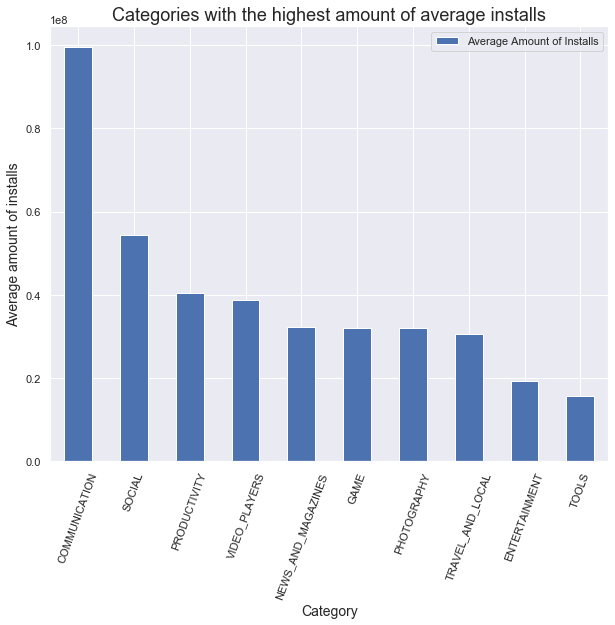

In [70]:
viz_1 = df_installs_top10.plot(kind='bar')
viz_1.set_title('Categories with the highest amount of average installs', size=18)
viz_1.set_ylabel('Average amount of installs', size=14)
viz_1.set_xlabel('Category', size=14)
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=70)

From this visualization, we can see the top 10 categories of apps on the google play store which have the highest average amount of installs. A key take away from this graph is that communication has almost twice as much installed as the second most category social. A quick search of the communication category on the google play store shows top apps such as Facebook Messenger, WhatsApp, and Discord.

In [71]:
ratings_data = {'Category Name': [df_preprocessed.columns.values[3], df_preprocessed.columns.values[4],
                                   df_preprocessed.columns.values[5], df_preprocessed.columns.values[6],
                                   df_preprocessed.columns.values[7], df_preprocessed.columns.values[8],
                                   df_preprocessed.columns.values[9], df_preprocessed.columns.values[10],
                                   df_preprocessed.columns.values[11], df_preprocessed.columns.values[12],
                                   df_preprocessed.columns.values[13], df_preprocessed.columns.values[14],
                                   df_preprocessed.columns.values[15], df_preprocessed.columns.values[16],
                                   df_preprocessed.columns.values[17], df_preprocessed.columns.values[18],
                                   df_preprocessed.columns.values[19], df_preprocessed.columns.values[20],
                                   df_preprocessed.columns.values[21], df_preprocessed.columns.values[22],
                                   df_preprocessed.columns.values[23], df_preprocessed.columns.values[24],
                                   df_preprocessed.columns.values[25], df_preprocessed.columns.values[26],
                                   df_preprocessed.columns.values[27], df_preprocessed.columns.values[28],
                                   df_preprocessed.columns.values[29], df_preprocessed.columns.values[30],
                                   df_preprocessed.columns.values[31], df_preprocessed.columns.values[32],
                                   df_preprocessed.columns.values[33], df_preprocessed.columns.values[34],
                                   df_preprocessed.columns.values[35]],
                 'Average Rating': [cat1_ratings, cat2_ratings, cat3_ratings, cat4_ratings, cat5_ratings,
                                                cat6_ratings, cat7_ratings, cat8_ratings, cat9_ratings, cat10_ratings,
                                                cat11_ratings, cat12_ratings, cat13_ratings, cat14_ratings,
                                                cat15_ratings, cat16_ratings, cat17_ratings, cat18_ratings,
                                                cat19_ratings, cat20_ratings, cat21_ratings, cat22_ratings,
                                                cat23_ratings, cat24_ratings, cat25_ratings, cat26_ratings,
                                                cat27_ratings, cat28_ratings, cat29_ratings, cat30_ratings,
                                                cat31_ratings, cat32_ratings, cat33_ratings]
                }


In [72]:
df_ratings = pd.DataFrame(ratings_data, columns = ['Category Name', 'Average Rating'])

In [73]:
df_ratings

,Category Name,Average Rating
0,ART_AND_DESIGN,4.38
1,AUTO_AND_VEHICLES,4.19
2,BEAUTY,4.28
3,BOOKS_AND_REFERENCE,4.35
4,BUSINESS,4.13
5,COMICS,4.16
6,COMMUNICATION,4.16
7,DATING,3.97
8,EDUCATION,4.39
9,ENTERTAINMENT,4.13


In [74]:
df_ratings_top10 = df_ratings.sort_values('Average Rating', ascending=False).head(10)
df_ratings_top10.set_index('Category Name', inplace=True)

In [75]:
df_ratings_top10

,Average Rating
Category Name,
EVENTS,4.44
EDUCATION,4.39
ART_AND_DESIGN,4.38
BOOKS_AND_REFERENCE,4.35
PERSONALIZATION,4.34
PARENTING,4.30
GAME,4.29
BEAUTY,4.28
HEALTH_AND_FITNESS,4.28


[Text(0, 0, 'EVENTS'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'BEAUTY'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'SOCIAL')]

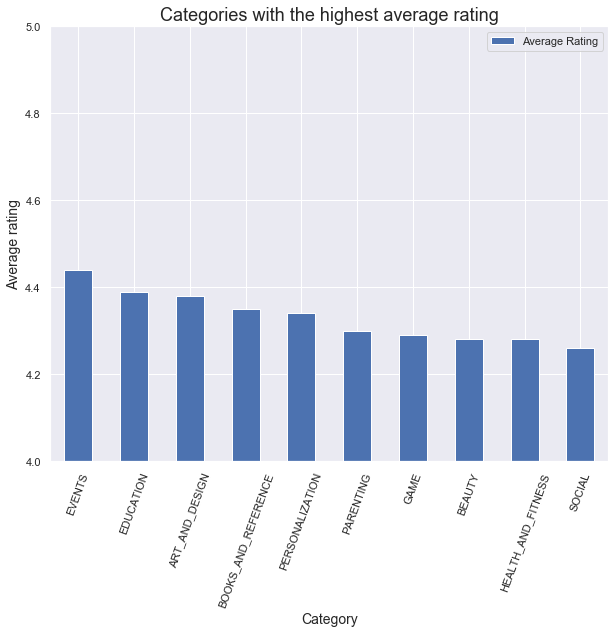

In [76]:
viz_2 = df_ratings_top10.plot(kind='bar')
viz_2.set_title('Categories with the highest average rating', size=18)
viz_2.set_ylabel('Average rating', size=14)
viz_2.set_ylim([4,5])
viz_2.set_xlabel('Category', size=14)
viz_2.set_xticklabels(viz_2.get_xticklabels(), rotation=70)

From this bar graph, we can see that the events, education, art and design, books and reference and personalization categories have high average ratings of 4.30 stars or greater. This tells us that there are already some really good apps in these categories. It can also show us that app users in this category tend to rate apps higher.

Some notable apps in each of the 5 categories are:

Events: Ticket Master, Gametime, StubHub

Education: Duolingo, Google Classroom, Peak Brain Game

Art and Design: Canva, ibis Paint X, Adobe Spark Post

Books and Reference: Audible, Rivet, Kindle

Personalization: Zedge, Voice Changer App, Flashligh

In [77]:
price_data = {'Category Name': [df_preprocessed.columns.values[3], df_preprocessed.columns.values[4],
                                   df_preprocessed.columns.values[5], df_preprocessed.columns.values[6],
                                   df_preprocessed.columns.values[7], df_preprocessed.columns.values[8],
                                   df_preprocessed.columns.values[9], df_preprocessed.columns.values[10],
                                   df_preprocessed.columns.values[11], df_preprocessed.columns.values[12],
                                   df_preprocessed.columns.values[13], df_preprocessed.columns.values[14],
                                   df_preprocessed.columns.values[15], df_preprocessed.columns.values[16],
                                   df_preprocessed.columns.values[17], df_preprocessed.columns.values[18],
                                   df_preprocessed.columns.values[19], df_preprocessed.columns.values[20],
                                   df_preprocessed.columns.values[21], df_preprocessed.columns.values[22],
                                   df_preprocessed.columns.values[23], df_preprocessed.columns.values[24],
                                   df_preprocessed.columns.values[25], df_preprocessed.columns.values[26],
                                   df_preprocessed.columns.values[27], df_preprocessed.columns.values[28],
                                   df_preprocessed.columns.values[29], df_preprocessed.columns.values[30],
                                   df_preprocessed.columns.values[31], df_preprocessed.columns.values[32],
                                   df_preprocessed.columns.values[33], df_preprocessed.columns.values[34],
                                   df_preprocessed.columns.values[35]],
                 'Average Price': [cat1_price, cat2_price, cat3_price, cat4_price, cat5_price,
                                                cat6_price, cat7_price, cat8_price, cat9_price, cat10_price,
                                                cat11_price, cat12_price, cat13_price, cat14_price,
                                                cat15_price, cat16_price, cat17_price, cat18_price,
                                                cat19_price, cat20_price, cat21_price, cat22_price,
                                                cat23_price, cat24_price, cat25_price, cat26_price,
                                                cat27_price, cat28_price, cat29_price, cat30_price,
                                                cat31_price, cat32_price, cat33_price]
                }

In [78]:
df_price = pd.DataFrame(price_data, columns = ['Category Name', 'Average Price'])

In [79]:
df_price

,Category Name,Average Price
0,ART_AND_DESIGN,0.10
1,AUTO_AND_VEHICLES,0.03
2,BEAUTY,0.00
3,BOOKS_AND_REFERENCE,0.13
4,BUSINESS,0.11
5,COMICS,0.00
6,COMMUNICATION,0.17
7,DATING,0.12
8,EDUCATION,0.12
9,ENTERTAINMENT,0.05


In [80]:
df_price_top10 = df_price.sort_values('Average Price', ascending=False).head(10)
df_price_top10.set_index('Category Name', inplace=True)

In [81]:
df_price_top10

,Average Price
Category Name,
MEDICAL,0.59
WEATHER,0.39
PERSONALIZATION,0.37
FAMILY,0.25
TOOLS,0.24
GAME,0.20
PARENTING,0.19
PRODUCTIVITY,0.18
PHOTOGRAPHY,0.18


[Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'WEATHER'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'COMMUNICATION')]

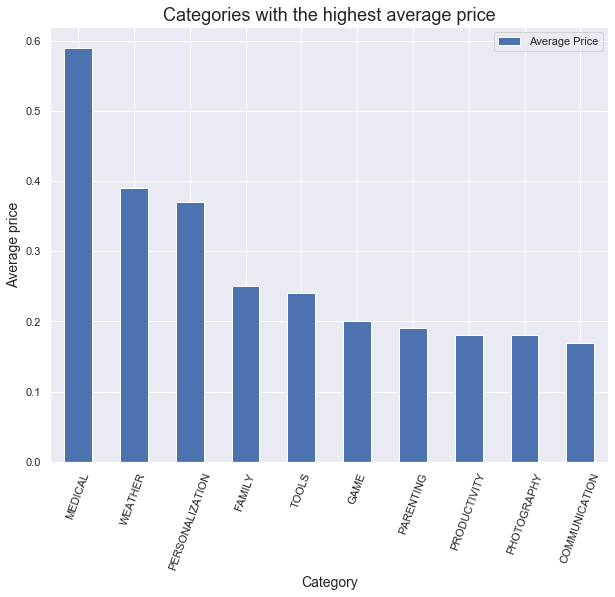

In [82]:
viz_3 = df_price_top10.plot(kind='bar')
viz_3.set_title('Categories with the highest average price', size=18)
viz_3.set_ylabel('Average price', size=14)
viz_3.set_xlabel('Category', size=14)
viz_3.set_xticklabels(viz_3.get_xticklabels(), rotation=70)

We can see that medical, weather and personalization are the highest average price categories by a considerable margin. We should also note that some categories have a mean price of 0 either because all apps in that category are free or apps with a price tag were removed during the preprocessing stage or they weren't included in the original dataset.

The top paid apps for the medical, weather and personalization categories are:

Medical: Monash Uni Low Foodmap Diet(9.38), Pedi STAT(6.99), Essential Anatomy 3(14.99)

Weather: Weather Forcast Pro(4.99), Weather App Pro(4.99), Deluxe Moon Calendar(3.79)

Personalization: Nova Launcher Prime(5.99), Volume Panel Pro(0.99), Fake GPS Joystick & Routes Go(5.99)

The Previous three Graphs gave us great insight into how certain categories attract more installation, get higher reviews and have a bigger price tag. A category such as game could be seen as very strong as it is present in all three graphs which tell us game apps are installed a lot, are reviewed kindly and can have a good price tag.

Next, I'm going to create violin graphs to see the distribution and density between rating and installs and price and installs.

In [83]:
vio_ratings = df_preprocessed.copy()

In [84]:
vio_ratings['Rating Rank'] = ''
vio_ratings.loc[(vio_ratings['Rating'] >= 0) & (vio_ratings['Rating'] <= 1), ['Rating Rank']] = 'Very Bad'
vio_ratings.loc[(vio_ratings['Rating'] >= 1.1) & (vio_ratings['Rating'] <= 2), ['Rating Rank']] = 'Bad'
vio_ratings.loc[(vio_ratings['Rating'] >= 2.1) & (vio_ratings['Rating'] <= 3), ['Rating Rank']] = 'Okay'
vio_ratings.loc[(vio_ratings['Rating'] >= 3.1) & (vio_ratings['Rating'] <= 4), ['Rating Rank']] = 'Good'
vio_ratings.loc[(vio_ratings['Rating'] >= 4.1) & (vio_ratings['Rating'] <= 5), ['Rating Rank']] = 'Very Good'

Text(0.5, 1.0, 'Density and distribution of rating for installs')

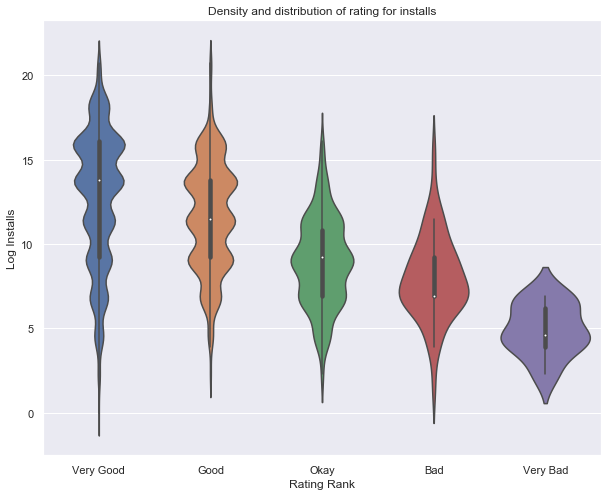

In [85]:
log_installs = np.log(vio_ratings['Installs'])
vio_ratings['Log Installs'] = log_installs

violin_data = vio_ratings

viz4 = sns.violinplot(data = violin_data, x = 'Rating Rank', y = 'Log Installs')
viz4.set_title('Density and distribution of rating for installs')

We can see that apps with higher ratings have more installs then those with low ratings. The very good and good rating have heads that extend much further than the other three ratings, also the very good rating is wider higher up then the other rating ranks. This clearly goes to show apps with higher rankings have more installations. For the above violin plot, I converted the installs column into log form for easier visualization.

In [86]:
vio_price = df_preprocessed.copy()

In [87]:
vio_price['Price Rank'] = ''
vio_price.loc[vio_price['Price'] == 0, ['Price Rank']] = 'Free'
vio_price.loc[(vio_price['Price'] >= 0.01) & (vio_price['Price'] <= 0.99), ['Price Rank']] = '0.01 to 0.99'
vio_price.loc[(vio_price['Price'] >= 1) & (vio_price['Price'] <= 1.99), ['Price Rank']] = '1 to 1.99'
vio_price.loc[(vio_price['Price'] >= 2) & (vio_price['Price'] <= 2.99), ['Price Rank']] = '2 to 2.99'
vio_price.loc[(vio_price['Price'] >= 3) & (vio_price['Price'] <= 3.99), ['Price Rank']] = '3 to 3.99'
vio_price.loc[(vio_price['Price'] >= 4) & (vio_price['Price'] <= 4.99), ['Price Rank']] = '4 to 4.99'
vio_price.loc[vio_price['Price'] >= 5, ['Price Rank']] = '5 or greater'

Text(0.5, 1.0, 'Density and distribution of price for installs')

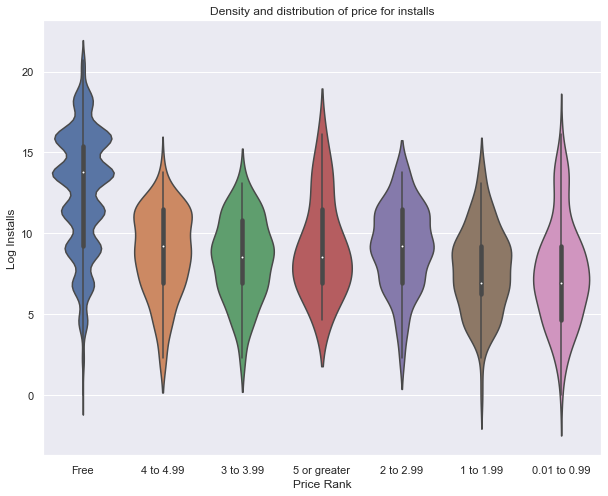

In [88]:
log_installs = np.log(vio_price['Installs'])
vio_price['Log Installs'] = log_installs

violin_data = vio_price

viz5 = sns.violinplot(data = violin_data, x = 'Price Rank', y = 'Log Installs')
viz5.set_title('Density and distribution of price for installs')

In [89]:
vio_price.loc[vio_price['Price Rank'] == '5 or greater'].describe().round(2)

,Installs,Rating,Price,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Adults only 18+,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Action,Action;Action & Adventure,Adventure,Adventure;Action & Adventure,Adventure;Brain Games,Adventure;Education,Arcade,Arcade;Action & Adventure,Arcade;Pretend Play,Art & Design,Art & Design;Creativity,Art & Design;Pretend Play,Auto & Vehicles,Beauty,Board,Board;Action & Adventure,Board;Brain Games,Board;Pretend Play,Books & Reference,Books & Reference;Education,Business,Card,Card;Action & Adventure,Card;Brain Games,Casino,Casual,Casual;Action & Adventure,Casual;Brain Games,Casual;Creativity,Casual;Education,Casual;Music & Video,Casual;Pretend Play,Comics,Comics;Creativity,Communication,Communication;Creativity,Dating,Education,Education;Action & Adventure,Education;Brain Games,Education;Creativity,Education;Education,Education;Music & Video,Education;Pretend Play,Educational,Educational;Action & Adventure,Educational;Brain Games,Educational;Creativity,Educational;Education,Educational;Pretend Play,Entertainment,Entertainment;Action & Adventure,Entertainment;Brain Games,Entertainment;Creativity,Entertainment;Education,Entertainment;Music & Video,Entertainment;Pretend Play,Events,Finance,Food & Drink,Health & Fitness,Health & Fitness;Action & Adventure,Health & Fitness;Education,House & Home,Libraries & Demo,Lifestyle,Lifestyle;Education,Lifestyle;Pretend Play,Maps & Navigation,Medical,Music,Music & Audio;Music & Video,Music;Music & Video,News & Magazines,Parenting,Parenting;Brain Games,Parenting;Education,Parenting;Music & Video,Personalization,Photography,Productivity,Puzzle,Puzzle;Action & Adventure,Puzzle;Brain Games,Puzzle;Creativity,Puzzle;Education,Racing,Racing;Action & Adventure,Racing;Pretend Play,Role Playing,Role Playing;Action & Adventure,Role Playing;Brain Games,Role Playing;Pretend Play,Shopping,Simulation,Simulation;Action & Adventure,Simulation;Education,Simulation;Pretend Play,Social,Sports,Sports;Action & Adventure,Strategy,Strategy;Action & Adventure,Strategy;Creativity,Strategy;Education,Tools,Tools;Education,Travel & Local,Travel & Local;Action & Adventure,Trivia,Video Players & Editors,Video Players & Editors;Creativity,Video Players & Editors;Music & Video,Weather,Word,Log Installs
count,45.00,45.00,45.00,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.00,45.00,45.0,45.0,45.00,45.0,45.0,45.00,45.00,45.0,45.0,45.00,45.0,45.00,45.0,45.0,45.00,45.00,45.00,45.0,45.0,45.0,45.00,45.00,45.00,45.00,45.0,45.00,45.00,45.00,45.00,45.0,45.00,45.0,45.00,45.0,45.0,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.00,45.0,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.00,45.00,45.00,45.00,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.00,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.0,45.00,45.0,45.00,45.0,45.0,45.00,45.0,45.0,45.00,45.0,45.00
mean,579531.11,4.32,6.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.02,0.0,0.0,0.13,0.0,0.0,0.13,0.04,0.0,0.0,0.04,0.0,0.27,0.0,0.0,0.02,0.07,0.07,0.0,0.0,0.0,0.04,0.04,0.02,0.04,0.0,0.82,0.04,0.04,0.09,0.0,0.04,0.0,0.04,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.07,0.07,0.02,

It's not a surprise that app's which is free or cost less than a dollar has some of the most installs on the google play store, but some interesting insight from this graph is that apps that cost 5 or more are being installed more than all the other price ranks except for free. On top of that, apps priced at 5 or, greater have a wide head which shows it's not just one app making it look better than it is.

For the next piece of analysis, I want to see what categories have the most apps on the google play store. Hopefully, this will tell us what categories have little or a lot of competition.

In [90]:
cat_pie = df_preprocessed.copy()

In [91]:
cat_pie = cat_pie.iloc[:,3:36]

In [92]:
cat_pie.head()

,ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
cat_pie = cat_pie.mean()

Text(0.5, 1.0, 'Amount of apps in each category')

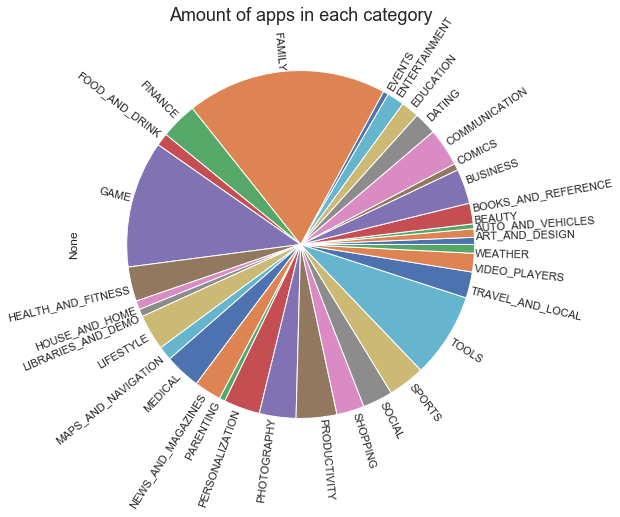

In [94]:
viz6 = cat_pie.plot(kind='pie', rotatelabels=True, labeldistance=1)
viz6.set_title('Amount of apps in each category', size=18)

As we can see from this pie chart is that most of the games on the google play store are in the family, game and tool category. This could indicate too high supply for apps in these categories depending on how much demand we believe there is. This could also tell us that apps in these popular categories will be fighting harder for more installs as there is lots of competition.

The last chart I want to make for this section is a bar graph showing the average revenue apps in each category make.

In [95]:
avg_rev1 = cat1_installs * cat1_price
avg_rev2 = cat2_installs * cat2_price
avg_rev3 = cat3_installs * cat3_price
avg_rev4 = cat4_installs * cat4_price
avg_rev5 = cat5_installs * cat5_price
avg_rev6 = cat6_installs * cat6_price
avg_rev7 = cat7_installs * cat7_price
avg_rev8 = cat8_installs * cat8_price
avg_rev9 = cat9_installs * cat9_price
avg_rev10 = cat10_installs * cat10_price
avg_rev11 = cat11_installs * cat11_price
avg_rev12 = cat12_installs * cat12_price
avg_rev13 = cat13_installs * cat13_price
avg_rev14 = cat14_installs * cat14_price
avg_rev15 = cat15_installs * cat15_price
avg_rev16 = cat16_installs * cat16_price
avg_rev17 = cat17_installs * cat17_price
avg_rev18 = cat18_installs * cat18_price
avg_rev19 = cat19_installs * cat19_price
avg_rev20 = cat20_installs * cat20_price
avg_rev21 = cat21_installs * cat21_price
avg_rev22 = cat22_installs * cat22_price
avg_rev23 = cat23_installs * cat23_price
avg_rev24 = cat24_installs * cat24_price
avg_rev25 = cat25_installs * cat25_price
avg_rev26 = cat26_installs * cat26_price
avg_rev27 = cat27_installs * cat27_price
avg_rev28 = cat28_installs * cat28_price
avg_rev29 = cat29_installs * cat29_price
avg_rev30 = cat30_installs * cat30_price
avg_rev31 = cat31_installs * cat31_price
avg_rev32 = cat32_installs * cat32_price
avg_rev33 = cat33_installs * cat33_price

In [96]:
rev_data = {'Category Name': [df_preprocessed.columns.values[3], df_preprocessed.columns.values[4],
                                   df_preprocessed.columns.values[5], df_preprocessed.columns.values[6],
                                   df_preprocessed.columns.values[7], df_preprocessed.columns.values[8],
                                   df_preprocessed.columns.values[9], df_preprocessed.columns.values[10],
                                   df_preprocessed.columns.values[11], df_preprocessed.columns.values[12],
                                   df_preprocessed.columns.values[13], df_preprocessed.columns.values[14],
                                   df_preprocessed.columns.values[15], df_preprocessed.columns.values[16],
                                   df_preprocessed.columns.values[17], df_preprocessed.columns.values[18],
                                   df_preprocessed.columns.values[19], df_preprocessed.columns.values[20],
                                   df_preprocessed.columns.values[21], df_preprocessed.columns.values[22],
                                   df_preprocessed.columns.values[23], df_preprocessed.columns.values[24],
                                   df_preprocessed.columns.values[25], df_preprocessed.columns.values[26],
                                   df_preprocessed.columns.values[27], df_preprocessed.columns.values[28],
                                   df_preprocessed.columns.values[29], df_preprocessed.columns.values[30],
                                   df_preprocessed.columns.values[31], df_preprocessed.columns.values[32],
                                   df_preprocessed.columns.values[33], df_preprocessed.columns.values[34],
                                   df_preprocessed.columns.values[35]],
                 'Average Revenue': [avg_rev1, avg_rev2, avg_rev3, avg_rev4, avg_rev5, avg_rev6, avg_rev7, avg_rev8,
                                     avg_rev9, avg_rev10, avg_rev11, avg_rev12, avg_rev13, avg_rev14, avg_rev15, avg_rev16,
                                     avg_rev17, avg_rev18, avg_rev19, avg_rev20, avg_rev21, avg_rev22, avg_rev23, avg_rev24,
                                     avg_rev25, avg_rev26, avg_rev27, avg_rev28, avg_rev29, avg_rev30, avg_rev31, avg_rev32,
                                     avg_rev33]}

In [97]:
df_revenue = pd.DataFrame(rev_data, columns = ['Category Name', 'Average Revenue'])

In [98]:
df_revenue.round(2)

,Category Name,Average Revenue
0,ART_AND_DESIGN,203652.62
1,AUTO_AND_VEHICLES,21834.16
2,BEAUTY,0.00
3,BOOKS_AND_REFERENCE,1403190.53
4,BUSINESS,367314.74
5,COMICS,0.00
6,COMMUNICATION,16920826.40
7,DATING,162643.14
8,EDUCATION,674595.10
9,ENTERTAINMENT,962805.37


We have some categories that have 0's either because all the apps in those categories are free or the paid apps were removed during preprocessing. I'm going to drop the categories with 0's for better visualization.

In [99]:
df_revenue = df_revenue[df_revenue['Average Revenue'] != 0]

In [100]:
df_revenue.set_index('Category Name', inplace=True)

[Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'WEATHER')]

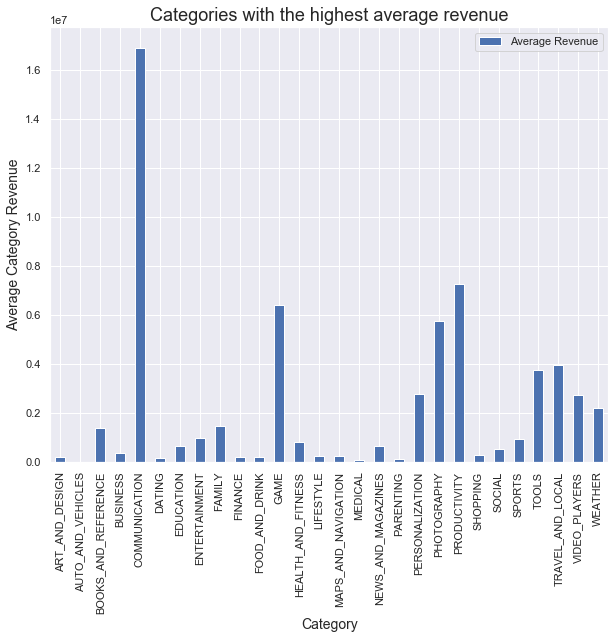

In [101]:
viz7 = df_revenue.plot(kind='bar')
viz7.set_title('Categories with the highest average revenue', size=18)
viz7.set_ylabel('Average Category Revenue', size=14)
viz7.set_xlabel('Category', size=14)
viz7.set_xticklabels(viz7.get_xticklabels(), rotation=90)

Although this chart does very little for us in answering the question of how to get more installs I still find it very interesting and useful. The insight I take away from this chart is the demand consumers have for each category and what type of apps people are more willing to spend money on.

## K-Means Clustering

For are kmeans cluster analysis it will be better if the installs column was in log form. So the first thing I will do is create a new column with all the installs values in log form.

In [102]:
df_cluster = df_preprocessed.copy()

In [103]:
log_installs = np.log(df_cluster['Installs'])
df_cluster['Log Installs'] = log_installs

For the first cluster, I will use installs and ratings to create a simple picture showing us the effects certain ratings have on the overall install count.

Text(0, 0.5, 'Log Installs')

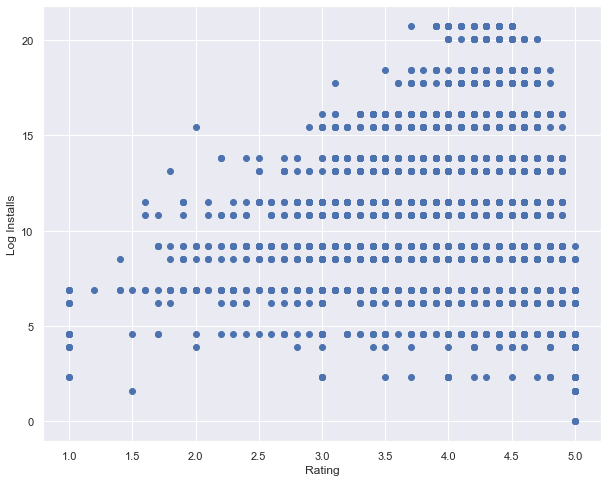

In [104]:
plt.scatter(df_cluster['Rating'], df_cluster['Log Installs'])
plt.xlabel('Rating')
plt.ylabel('Log Installs')

In [105]:
df_cluster1 = df_cluster[['Installs', 'Rating']]

In [106]:
df_cluster1.head()

,Installs,Rating
0,10000,4.1
1,500000,3.9
2,5000000,4.7
3,50000000,4.5
4,100000,4.3


In [107]:
cluster1_scaled = preprocessing.scale(df_cluster1)

In [108]:
cluster1_scaled

array([[-0.19716643, -0.1787261 ],
       [-0.19182351, -0.5667058 ],
       [-0.14275586,  0.98521299],
       ...,
       [-0.19727438,  1.56718254],
       [-0.19726457,  0.59723329],
       [-0.08823624,  0.59723329]])

Going to use the elbow method to help decide how many clusters to use.

In [109]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(cluster1_scaled)
    wcss.append(kmeans.inertia_)
    
wcss    

[18530.0,
 10731.980074641915,
 5268.787213897535,
 3506.0288968636855,
 2543.9355036312613,
 1794.4817320257357,
 1363.5338243469887,
 949.352014301656,
 731.6389291021487]

Text(0, 0.5, 'WCSS')

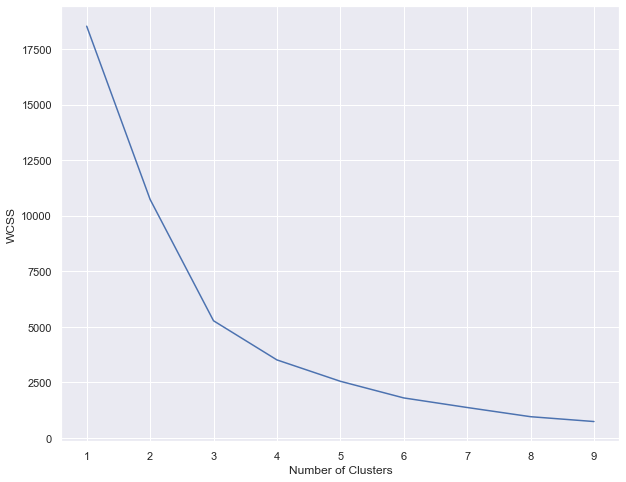

In [110]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [111]:
kmeans1 = KMeans(3)
kmeans1.fit(cluster1_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [112]:
cluster1 = df_cluster1.copy()
cluster1['Predicted Cluster'] = kmeans1.fit_predict(cluster1_scaled)

Creating a log install column for easier visualization.

In [113]:
log_installs = np.log(cluster1['Installs'])
cluster1['Log Installs'] = log_installs
cluster1.head()

,Installs,Rating,Predicted Cluster,Log Installs
0,10000,4.1,1,9.210340
1,500000,3.9,1,13.122363
2,5000000,4.7,1,15.424948
3,50000000,4.5,1,17.727534
4,100000,4.3,1,11.512925


Text(0, 0.5, 'Log Installs')

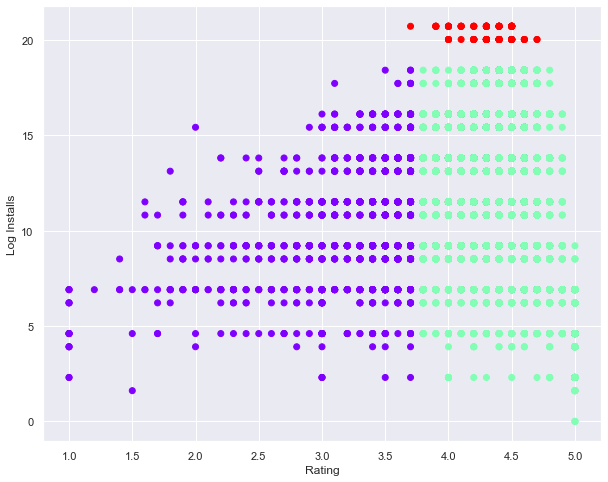

In [114]:
plt.scatter(cluster1['Rating'], cluster1['Log Installs'], c = cluster1['Predicted Cluster'], cmap = 'rainbow')
plt.xlabel('Rating')
plt.ylabel('Log Installs')

For this cluster analysis, we used 3 clusters that show us how a particular rating affects the number of installs. From this cluster, we can take away that there are a lot of apps with a rating of 3.75 or less that have lower install counts when compared to apps with a rating between 4 and 5 which seem to have more apps receiving higher install counts. We also have the red cluster that shows us apps that have a very high amount of installs with each app receiving a very nice rating.

For the second cluster, I will use installs and price to create a simple plot showing us the effects certain prices have on the overall install count.

Text(0, 0.5, 'Log Installs')

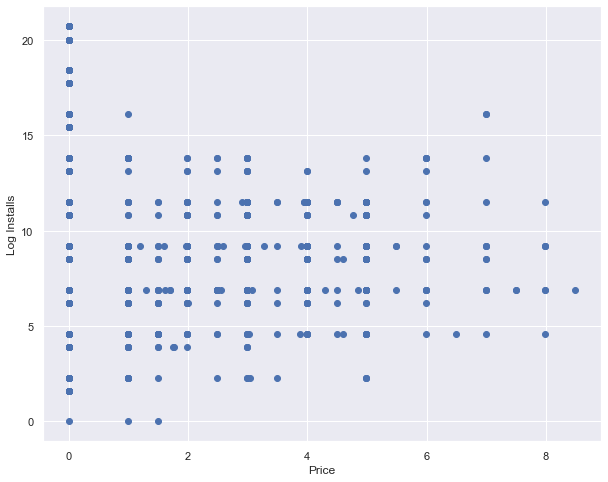

In [115]:
plt.scatter(df_cluster['Price'], df_cluster['Log Installs'])
plt.xlabel('Price')
plt.ylabel('Log Installs')

In [116]:
df_cluster2 = df_cluster[['Installs', 'Price']]

In [117]:
df_cluster2.head()

,Installs,Price
0,10000,0.0
1,500000,0.0
2,5000000,0.0
3,50000000,0.0
4,100000,0.0


In [118]:
cluster2_scaled = preprocessing.scale(df_cluster2)

In [119]:
cluster2_scaled

array([[-0.19716643, -0.21800584],
       [-0.19182351, -0.21800584],
       [-0.14275586, -0.21800584],
       ...,
       [-0.19727438, -0.21800584],
       [-0.19726457, -0.21800584],
       [-0.08823624, -0.21800584]])

In [120]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(cluster2_scaled)
    wcss.append(kmeans.inertia_)
    
wcss    

[18530.0,
 10713.019589519756,
 2934.753577435924,
 1979.9309286036187,
 1115.9608728125693,
 688.2898596245766,
 377.7138784272986,
 244.04180205795632,
 187.0586907894572]

Text(0, 0.5, 'WCSS')

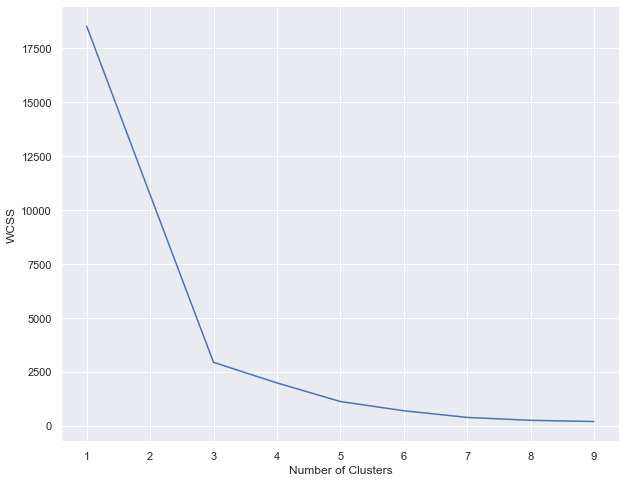

In [121]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [122]:
kmeans2 = KMeans(3)
kmeans2.fit(cluster2_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [123]:
cluster2 = df_cluster2.copy()
cluster2['Predicted Cluster'] = kmeans2.fit_predict(cluster2_scaled)

In [124]:
log_installs = np.log(cluster2['Installs'])
cluster2['Log Installs'] = log_installs
cluster2.head()

,Installs,Price,Predicted Cluster,Log Installs
0,10000,0.0,0,9.210340
1,500000,0.0,0,13.122363
2,5000000,0.0,0,15.424948
3,50000000,0.0,0,17.727534
4,100000,0.0,0,11.512925


Text(0, 0.5, 'Log Installs')

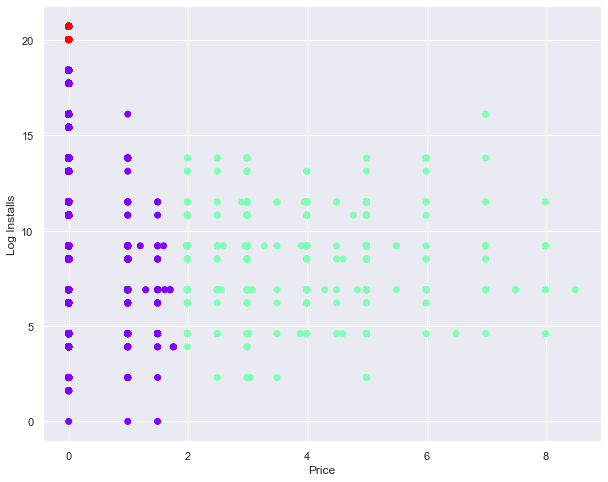

In [125]:
plt.scatter(cluster2['Price'], cluster2['Log Installs'], c = cluster2['Predicted Cluster'], cmap = 'rainbow')
plt.xlabel('Price')
plt.ylabel('Log Installs')

The main take away from this cluster analysis is that there are a few free apps that have a lot of installs. Then there are apps which are free or less than 1.99 that have some high install rates but also some low install rate. Finally, there is the purple cluster that shows apps that cost 2 or more dollars that have no apps being installed less than the turquoise cluster but also doesn't have as many apps with high install rates as the other two clusters.

For the last cluster analysis, I'm going to chart the number of apps in each category and the average revenue of each category. The insight I'm hoping to obtain by doing this is to create 4 clusters representing categories with; low supply high demand, low supply low demand, high supply high demand and high supply low demand.

In [126]:
df_cluster3 = pd.DataFrame(rev_data, columns = ['Category Name', 'Average Revenue'])

In [127]:
cat_count = df_preprocessed.copy()

In [128]:
cat_count = cat_count.iloc[:,3:36]

In [129]:
cat_count.sum()

ART_AND_DESIGN           61
AUTO_AND_VEHICLES        73
BEAUTY                   42
BOOKS_AND_REFERENCE     178
BUSINESS                300
COMICS                   58
COMMUNICATION           328
DATING                  195
EDUCATION               155
ENTERTAINMENT           149
EVENTS                   45
FAMILY                 1723
FINANCE                 316
FOOD_AND_DRINK          109
GAME                   1093
HEALTH_AND_FITNESS      297
HOUSE_AND_HOME           76
LIBRARIES_AND_DEMO       64
LIFESTYLE               308
MAPS_AND_NAVIGATION     122
MEDICAL                 309
NEWS_AND_MAGAZINES      233
PARENTING                50
PERSONALIZATION         311
PHOTOGRAPHY             315
PRODUCTIVITY            350
SHOPPING                238
SOCIAL                  259
SPORTS                  317
TOOLS                   731
TRAVEL_AND_LOCAL        225
VIDEO_PLAYERS           160
WEATHER                  75
dtype: int64

In [130]:
cat_count_data = []

for x in cat_count.sum():
    cat_count_data.append(x)

In [131]:
df_cluster3['Category Count'] = cat_count_data

Going to convert average revenue into log form for better visualization.

In [132]:
log_revenue = np.log(df_cluster3['Average Revenue'])
df_cluster3['Log Avg Revenue'] = log_revenue
df_cluster3.head()

C:\Users\Vinny\Anaconda3\envs\py3-TF2.0\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Category Name,Average Revenue,Category Count,Log Avg Revenue
0,ART_AND_DESIGN,2.036526e+05,61,12.224171
1,AUTO_AND_VEHICLES,2.183416e+04,73,9.991231
2,BEAUTY,0.000000e+00,42,-inf
3,BOOKS_AND_REFERENCE,1.403191e+06,178,14.154259
4,BUSINESS,3.673147e+05,300,12.813974


In [133]:
df_cluster3 = df_cluster3[df_cluster3['Average Revenue'] != 0]

In [134]:
df_cluster3.round(2)

,Category Name,Average Revenue,Category Count,Log Avg Revenue
0,ART_AND_DESIGN,203652.62,61,12.22
1,AUTO_AND_VEHICLES,21834.16,73,9.99
3,BOOKS_AND_REFERENCE,1403190.53,178,14.15
4,BUSINESS,367314.74,300,12.81
6,COMMUNICATION,16920826.40,328,16.64
7,DATING,162643.14,195,12.00
8,EDUCATION,674595.10,155,13.42
9,ENTERTAINMENT,962805.37,149,13.78
11,FAMILY,1488244.82,1723,14.21
12,FINANCE,194170.12,316,12.18


Text(0, 0.5, 'Log Avg Revenue')

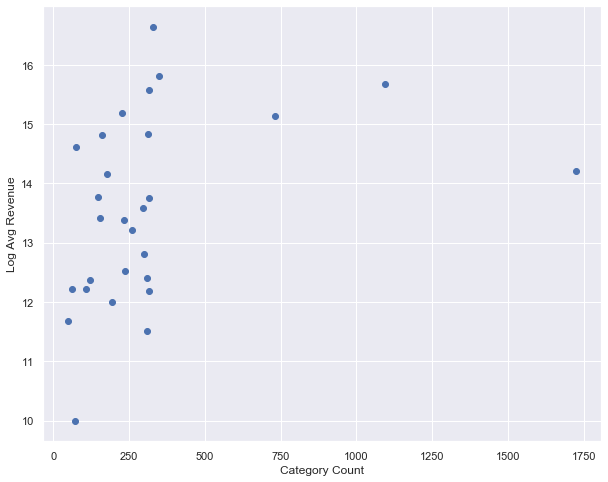

In [135]:
plt.scatter(df_cluster3['Category Count'], df_cluster3['Log Avg Revenue'])
plt.xlabel('Category Count')
plt.ylabel('Log Avg Revenue')

The points with very high category counts might give us a problem, but I will try the cluster analysis with them included and see what happens.

In [136]:
cluster_3 = df_cluster3[['Average Revenue', 'Category Count']]

In [137]:
cluster3_scaled = preprocessing.scale(cluster_3)

In [138]:
cluster3_scaled

array([[-0.57310852, -0.76505209],
       [-0.62548641, -0.72970314],
       [-0.22754806, -0.42039991],
       [-0.52596107, -0.06101901],
       [ 4.24274117,  0.02146186],
       [-0.58492245, -0.37032224],
       [-0.43744036, -0.48815205],
       [-0.35441333, -0.50582652],
       [-0.20304579,  4.13077627],
       [-0.57584022, -0.01388708],
       [-0.5738906 , -0.62365632],
       [ 1.21770762,  2.27495686],
       [-0.40145128, -0.06985624],
       [-0.56140295, -0.03745304],
       [-0.56337744, -0.58536163],
       [-0.60290151, -0.0345073 ],
       [-0.44641213, -0.25838393],
       [-0.59771366, -0.79745528],
       [ 0.16518334, -0.02861581],
       [ 1.02890944, -0.01683283],
       [ 1.46847061,  0.08626825],
       [-0.55315209, -0.2436552 ],
       [-0.4752817 , -0.18179455],
       [-0.36126763, -0.01094134],
       [ 0.45119683,  1.20859713],
       [ 0.51149467, -0.28194989],
       [ 0.15239496, -0.47342332],
       [ 0.00651855, -0.72381165]])

In [139]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(cluster3_scaled)
    wcss.append(kmeans.inertia_)
    
wcss   

[56.0,
 29.12241025425688,
 14.16920469898647,
 7.472384175521076,
 4.158292229510032,
 2.865199125889422,
 1.831560535665844,
 0.969229608882532,
 0.676693988719108]

Text(0, 0.5, 'WCSS')

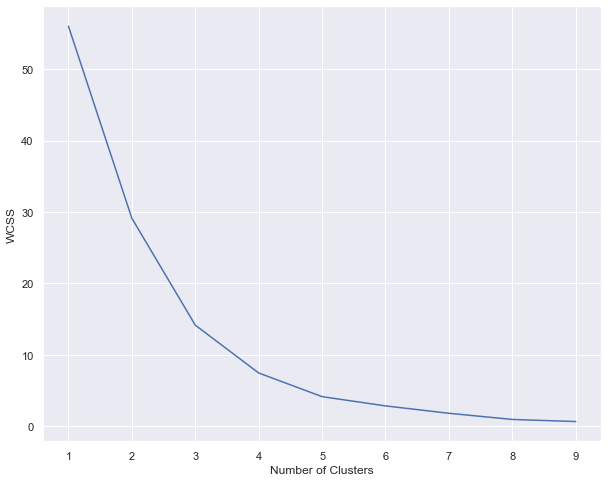

In [140]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [141]:
kmeans3 = KMeans(4)
kmeans3.fit(cluster3_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [142]:
cluster3 = cluster_3.copy()
cluster3['Predicted Cluster'] = kmeans3.fit_predict(cluster3_scaled)

In [143]:
log_revenue = np.log(cluster3['Average Revenue'])
cluster3['Log Avg Revenue'] = log_revenue
cluster3

,Average Revenue,Category Count,Predicted Cluster,Log Avg Revenue
0,2.036526e+05,61,0,12.224171
1,2.183416e+04,73,0,9.991231
3,1.403191e+06,178,0,14.154259
4,3.673147e+05,300,0,12.813974
6,1.692083e+07,328,3,16.644056
7,1.626431e+05,195,0,11.999314
8,6.745951e+05,155,0,13.421868
9,9.628054e+05,149,0,13.777607
11,1.488245e+06,1723,1,14.213108
12,1.941701e+05,316,0,12.176490


Text(0, 0.5, 'Log Avg Revenue')

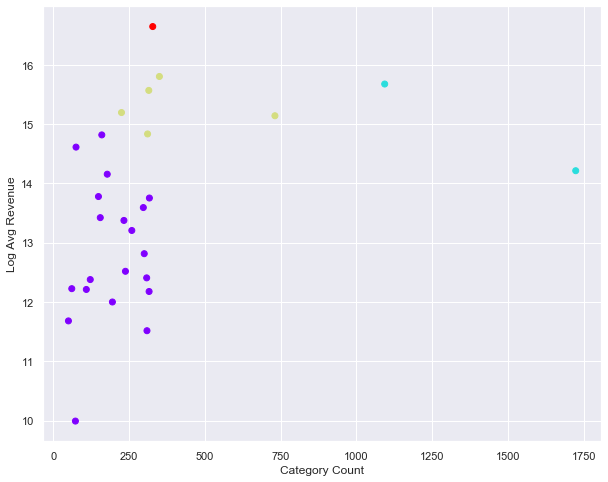

In [144]:
plt.scatter(cluster3['Category Count'], cluster3['Log Avg Revenue'], c = cluster3['Predicted Cluster'], cmap = 'rainbow')
plt.xlabel('Category Count')
plt.ylabel('Log Avg Revenue')

The 3 outliers did affect this model making it more difficult to come to a different conclusion. What we can take away from this graph is the one gold cluster a the top which is the communication category that is in very high demand, but the supply could be deceiving due to the 3 outliers skewing the graph. I'm going to try this type of analysis again but this time without the 3 outlier categories family, game and tools. I'm also going to get rid of the auto and vehicles category as its average revenue is much smaller than the rest which will affect the new model negatively. Lastly, I'm also going to remove the communication category because its average revenue is very high which will affect the model negatively.

In [145]:
df_cluster4 = df_cluster3.copy()

In [146]:
df_cluster4 = df_cluster4[df_cluster4['Category Count'] < 500]

In [147]:
df_cluster4 = df_cluster4[df_cluster4['Log Avg Revenue'] > 10]

In [148]:
df_cluster4 = df_cluster4[df_cluster4['Log Avg Revenue'] < 16]

Text(0, 0.5, 'Log Avg Revenue')

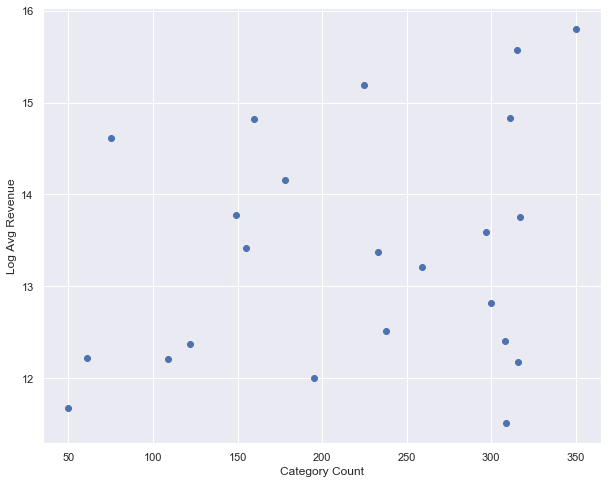

In [149]:
plt.scatter(df_cluster4['Category Count'], df_cluster4['Log Avg Revenue'])
plt.xlabel('Category Count')
plt.ylabel('Log Avg Revenue')

In [150]:
cluster_4 = df_cluster4[['Average Revenue', 'Category Count']]

In [151]:
cluster4_scaled = preprocessing.scale(cluster_4)

In [152]:
cluster4_scaled

array([[-0.6496217 , -1.71263747],
       [-0.01207189, -0.44267125],
       [-0.56263592,  0.88156704],
       [-0.67141809, -0.25814624],
       [-0.39931758, -0.69232273],
       [-0.24613492, -0.7574492 ],
       [-0.65466162,  1.05523764],
       [-0.65106462, -1.19162569],
       [-0.3329187 ,  0.84900381],
       [-0.62802524,  0.96840234],
       [-0.63166812, -1.05051833],
       [-0.70458897,  0.97925675],
       [-0.41587025,  0.15432143],
       [-0.69501754, -1.83203601],
       [ 0.71250703,  1.00096558],
       [ 2.3060586 ,  1.04438323],
       [ 3.1170372 ,  1.42428765],
       [-0.61280263,  0.20859349],
       [-0.46913384,  0.43653614],
       [-0.25878093,  1.06609205],
       [ 1.35144218,  0.06748613],
       [ 0.68891282, -0.63805066],
       [ 0.41977474, -1.5606757 ]])

In [153]:
wcss = []

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(cluster4_scaled)
    wcss.append(kmeans.inertia_)
    
wcss   

[46.00000000000001,
 25.941524701667504,
 10.15480292897196,
 7.016479994449349,
 5.058554996256623,
 3.560876185106591,
 2.736103915209558,
 1.9396224181892385,
 1.4777862837413784]

Text(0, 0.5, 'WCSS')

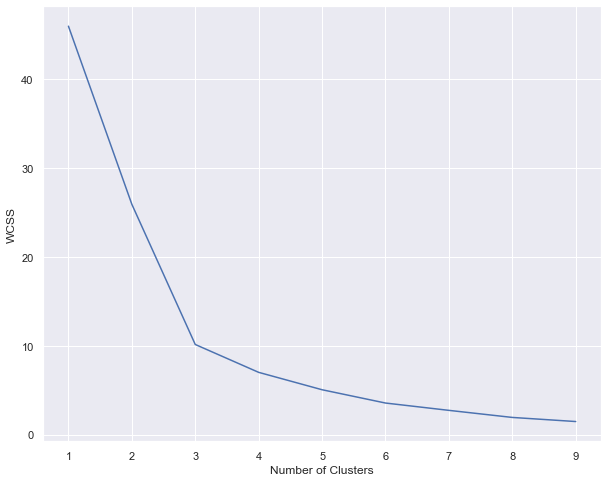

In [154]:
plt.plot(range(1,10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

In [155]:
kmeans4 = KMeans(6)
kmeans4.fit(cluster4_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [156]:
cluster4 = df_cluster4.copy()
cluster4['Predicted Cluster'] = kmeans4.fit_predict(cluster4_scaled)

Text(0, 0.5, 'Log Avg Revenue')

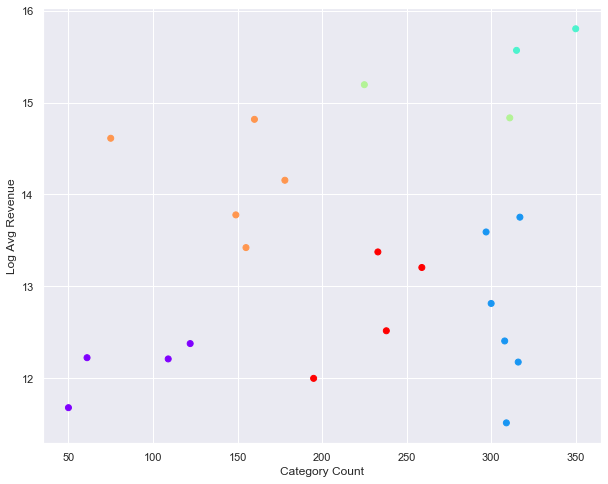

In [157]:
plt.scatter(cluster4['Category Count'], cluster4['Log Avg Revenue'], c = cluster4['Predicted Cluster'], cmap = 'rainbow')
plt.xlabel('Category Count')
plt.ylabel('Log Avg Revenue')

In [158]:
cluster4['Cluster Color'] = ''
cluster4.loc[cluster4['Predicted Cluster'] == 0, ['Cluster Color']] = 'Purple'
cluster4.loc[cluster4['Predicted Cluster'] == 1, ['Cluster Color']] = 'Blue'
cluster4.loc[cluster4['Predicted Cluster'] == 2, ['Cluster Color']] = 'Turquoise'
cluster4.loc[cluster4['Predicted Cluster'] == 3, ['Cluster Color']] = 'Lime Green'
cluster4.loc[cluster4['Predicted Cluster'] == 4, ['Cluster Color']] = 'Orange'
cluster4.loc[cluster4['Predicted Cluster'] == 5, ['Cluster Color']] = 'Red'

In [159]:
cluster4_analysis = cluster4[['Category Name', 'Cluster Color']]

In [160]:
cluster4_analysis

,Category Name,Cluster Color
0,ART_AND_DESIGN,Purple
3,BOOKS_AND_REFERENCE,Orange
4,BUSINESS,Blue
7,DATING,Red
8,EDUCATION,Orange
9,ENTERTAINMENT,Orange
12,FINANCE,Blue
13,FOOD_AND_DRINK,Purple
15,HEALTH_AND_FITNESS,Blue
18,LIFESTYLE,Blue


I decided to go with 6 clusters as I liked the way it distributed. From this cluster analysis, we can see the orange cluster which has low supply and high demand, the five categories in this cluster is weather, video players, books and reference, education and entertainment. We can also see from the turquoise cluster categories which are high supply but very high demand, these categories are photography and productivity. From this cluster analysis, we can also take away that categories from the blue cluster are both high in supply and relatively low in demand.

I'm going to end this analysis here, as I feel we have gained great insight into what apps are being installed and popular categories. Some of the big takeaways throughout this analysis are; free apps have the potential to get a high amount of installs and If your going to charge money for your app you should consider pricing it on the higher side as the impact of a greater price to total installs doesn't appear to have a significant negative effect, this could be because consumers associate higher price with higher quality. Also, we learned that having a good rating makes for higher install amounts, this makes sense as potential customers tend to base whether or not a product is worth there time from the ratings it has gotten. Thirdly, we learned just how popular the communications category is as it's average app installs are almost twice as much as the second biggest social category. Lastly, we got some great insight into the amount of competition in each category as well as how willing customers are to pay for apps in each category. To conclude there are still many more things we can do using this dataset to abstract an even greater understanding, as I haven't done any analysis using the content rating or genre columns. That being said I do feel we have done enough to answer the questions that were set forth, to begin with, that is what factors lead to high install rates and popular categories on the google play store. 

If interested I have also created a dashboard with tableau using this dataset that can be found at the link below. 

https://public.tableau.com/profile/vincenzo.grillone#!/vizhome/GooglePlayStoreDashboard_15707392714270/Dashboard1